In [1]:
import h5py
import ast
from astropy.table import QTable, Table, Column, vstack
import astropy.units as u
import astropy
%matplotlib inline
%matplotlib notebook
import pandas as pd
import numpy as np
import simsurvey
import simsurvey_tools as sst
import matplotlib.pylab as plt
import pandas as pd
import os
from ZTF_hdf5 import Write_LightCurve, Read_LightCurve, Plot_LightCurve
from ztf_simu import Simul_lc

In [2]:
home_dir = os.environ.get('HOME')
folder_dir = os.path.join(home_dir, 'ZTF/data/')
print(folder_dir)

/Users/manon/ZTF/data/


In [3]:
lc = Simul_lc(folder_dir=folder_dir, sfd98File='sfd98', rcidFile='ZTF_corners_rcid.txt', 
                csvFile ='2018_all_logs_from_dr1_rcid_zp_from_masci.csv', 
                z_range=(0.01, 0.1), dec_range=(-30, 90), n_det=1, ntransient=200, seed=70, threshold=1)()

args = range_args(self.generator.ntransient, *args) =  (0, 200, 1)
Determining field IDs for all objects


FloatProgress(value=0.0)


Generating lightcurves
ntransient: 200


FloatProgress(value=0.0)

/Users/manon/ZTF/simsurvey/simsurvey/simulsurvey.py:1577: RuntimeWarning: invalid value encountered in true_divide
  mask_det = lc['flux']/lc['fluxerr'] > thr
/Users/manon/ZTF/simsurvey/simsurvey/simulsurvey.py:1577: RuntimeWarning: invalid value encountered in true_divide
  mask_det = lc['flux']/lc['fluxerr'] > thr
/Users/manon/ZTF/simsurvey/simsurvey/simulsurvey.py:1577: RuntimeWarning: invalid value encountered in true_divide
  mask_det = lc['flux']/lc['fluxerr'] > thr
/Users/manon/ZTF/simsurvey/simsurvey/simulsurvey.py:1577: RuntimeWarning: invalid value encountered in true_divide
  mask_det = lc['flux']/lc['fluxerr'] > thr
/Users/manon/ZTF/simsurvey/simsurvey/simulsurvey.py:1577: RuntimeWarning: invalid value encountered in true_divide
  mask_det = lc['flux']/lc['fluxerr'] > thr
/Users/manon/ZTF/simsurvey/simsurvey/simulsurvey.py:1577: RuntimeWarning: invalid value encountered in true_divide
  mask_det = lc['flux']/lc['fluxerr'] > thr
/Users/manon/ZTF/simsurvey/simsurvey/simulsurv

In [4]:
lc[0]

time,band,flux,fluxerr,zp,zpsys,field,ccd,comment
float64,str4,float64,float64,float64,str2,int64,int64,str1
58480.55927080009,ztfr,647.9575973152275,129.72784112997064,26.325,ab,534,54,
58480.56410880014,ztfr,343.603256383861,127.4255875203169,26.325,ab,534,54,
58480.568946800195,ztfr,666.0046607081629,159.5806936049082,26.325,ab,534,54,
58480.57378470013,ztfr,576.1158362842125,209.56196382685815,26.325,ab,534,54,
58481.55883099977,ztfr,461.29403212497084,120.8507171118827,26.325,ab,534,54,
58481.563599499874,ztfr,492.0594713064386,97.76045344022664,26.325,ab,534,54,
58481.56837960007,ztfr,432.62512473729964,93.58573681014832,26.325,ab,534,54,
58481.573159699794,ztfr,524.0858759180538,126.36498055849543,26.325,ab,534,54,


In [5]:
ok = lc.meta
rejected = lc.meta_rejected
print(rejected)

[(0.09270487, 58505.93926347, 0.00049989,  0.27141043, -0.02165506, 0.08482707, 146.64467956, -0.52525957, 0.07966643,  34)
 (0.06387743, 58507.45581377, 0.00104392, -1.05510022, -0.05952653, 0.11498038, 333.39183673, 38.26685921, 0.11613298,  38)
 (0.05926243, 58182.6040986 , 0.00111588,  1.54904954,  0.06326394, 0.71632026,  50.07330929, 10.71667547, 0.72493049,  45)
 (0.06644118, 58454.33712372, 0.00068588, -0.65602883,  0.06426957, 0.1921346 , 274.92036479,  7.97146246, 0.18648709,  51)
 (0.09754614, 58512.67920576, 0.00096994,  2.35029895, -0.2119906 , 0.19415   , 350.85790185, 42.9083211 , 0.18074913, 124)
 (0.06562004, 58504.22620067, 0.00071726,  1.96777423,  0.10649188, 0.00351131, 254.480099  , 36.31552815, 0.01385115, 143)
 (0.09813964, 58378.09000431, 0.0004172 ,  1.68007246,  0.0387413 , 0.03646732, 210.05181043,  4.25005567, 0.02700631, 144)
 (0.0650462 , 58390.49062858, 0.00118424,  0.06109592, -0.12627228, 0.0187715 , 214.62517513, 17.82515976, 0.0146907 , 157)
 (0.0700

In [6]:
def Histo2(model, type_sn):
    var = ['z', 'x0', 'x1', 'c', 't0']
    dico = dict(zip(var, [(0,0), (0,1), (1,0), (1,1), (2,0)]))
    
    for variables in var :
        ipos = dico[variables][0]
        jpos = dico[variables][1]
        
        axs[ipos, jpos].hist(model[variables], label = 'Model : {}'.format(type_sn), alpha = 0.3)
        #plt.hist(model.meta_full[variables], label = 'Model : {}'.format(type_sn), alpha = 0.5)
        axs[ipos, jpos].set_title('Histo var {}'.format(variables))
        axs[ipos, jpos].legend()

<IPython.core.display.Javascript object>


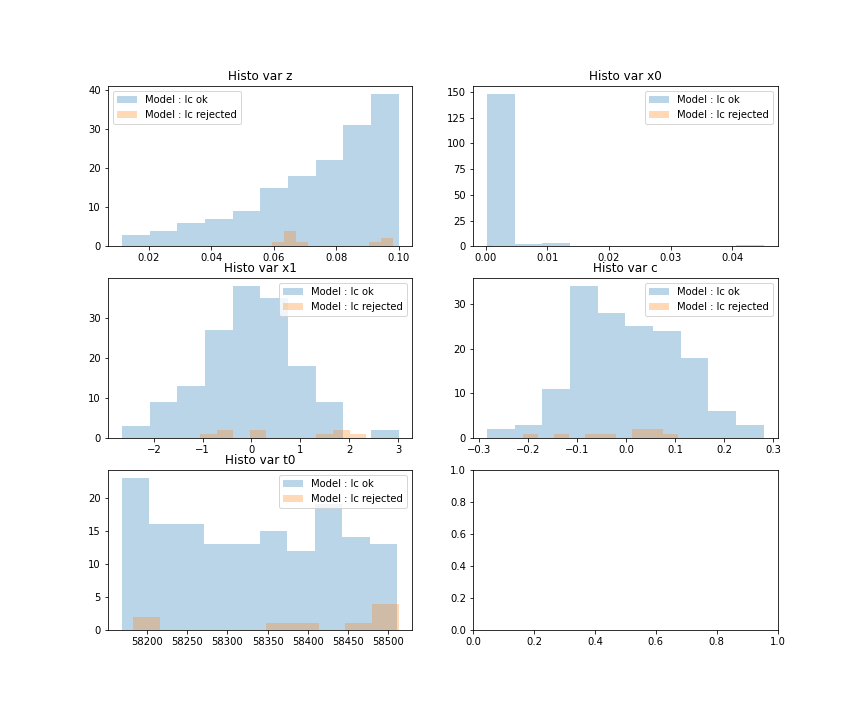

9


In [7]:
fig, axs = plt.subplots(3, 2, figsize=(12,10))
Histo2(lc.meta, 'lc ok')
if lc.meta_rejected is not None:
    Histo2(lc.meta_rejected, 'lc rejected')
    print(len(lc.meta_rejected))

In [8]:
clas = Write_LightCurve()
data = clas.write_data('Data', lc)
meta = clas.write_meta()
meta

lc is not an astropy.table.table.Table type <class 'simsurvey.simulsurvey.LightcurveCollection'>
OrderedDict([('directory', '/Users/manon/dataLC/Meta.hdf5'), ('file_name', 'Meta.dhf5')])


In [9]:
clas_meta = Read_LightCurve(file_name='Meta.hdf5')
read_meta = clas_meta.Read_file(path='meta')
if lc.meta_rejected is not None:
    meta_rej = clas.Tab_metaRejected(lc)
    for i, rows in enumerate(meta_rej):
        read_meta.add_row(rows)
read_meta

z,t0,x0,x1,c,mwebv,ra,dec,mwebv_sfd98,idx_orig,path
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str6
0.09746273114426751,58483.167429384026,0.0002614343305858402,-1.8658405972365433,0.053030910470542904,0.07181482625350322,250.41140881051317,14.4224899993984,0.05748984096150084,0,SN_0
0.08329532832943781,58195.48226026409,0.000359017161391952,0.3007697156664028,0.1274615987069436,0.06462611952665293,235.53639787982996,4.23909038927311,0.05374106783105196,2,SN_1
0.09665627314283415,58386.78240631505,0.000505982707805988,-0.9450556361365853,-0.10817712565613952,0.008896678318155962,201.35774295597005,52.504797162900076,0.010467815443961992,3,SN_2
0.06768985090609805,58219.86148145976,0.0011114594529267586,0.6298988874807598,-0.08123974369341731,0.047001370899624056,222.64048549432528,-0.9815841303399734,0.037900489850636425,4,SN_3
0.09496615230696706,58362.44562627654,0.0003958435625685267,1.5058726257130826,0.1031440471301942,0.041970449441198106,228.90048257574466,18.245608983335615,0.03215241355476769,6,SN_4
0.07527202479792483,58339.053886747824,0.0005176669915544692,0.4456885263409362,0.06137904766678725,0.2186599961477376,55.74910073528123,26.453019659813503,0.2039396376862567,7,SN_5
0.07864194667329098,58332.15400668631,0.0006944577166858705,1.0419713060512805,0.02220431871152738,0.04822078935360792,56.499026741709876,-14.684088652315332,0.04927630020425842,8,SN_6
0.07636610797218073,58408.75358742261,0.0005772585511934767,-1.5388358404651656,-0.059649276944205215,0.060093220777354434,197.9502140528582,-4.689353090198244,0.029374625816143106,9,SN_7
0.06350687289352495,58301.23250301095,0.0010406420857351046,-0.16052922060188868,-0.03316604287092953,0.03353820777468541,323.69882647478227,-0.5625482186932835,0.034162637997439634,11,SN_8


In [10]:
import csv
from astropy.table import Table
home_dir = os.environ.get('HOME')
folder_dir = os.path.join(home_dir, 'dataLC/selection_tab.csv')
folder_dir_seuil = os.path.join(home_dir, 'dataLC/seuil_name_selec.csv')

table = Table.read(folder_dir) #Lecture du fichier csv
table_2 = Table.read(folder_dir_seuil) #Lecture du fichier csv

In [11]:
print(table,'\n\n', table_2)

 col  lim_col type     op1    
----- ------- ---- -----------
phase       0  int operator.le
phase       0  int operator.ge
phase     -10  int operator.le
phase      20  int operator.ge
 band    ztfr  str operator.eq
 band    ztfg  str operator.eq
 band    ztfi  str operator.eq 

 seuil  name_selec 
----- ------------
    4   nb_phase<0
   10   nb_phase>0
    1 nb_phase<-10
    1  nb_phase>20
    0 nb_band_ztfr
    0 nb_band_ztfg
    0 nb_band_ztfi


In [12]:
import operator
def selec_phase(Tab, csvFile, limSNR, selec=False, Verbose=False, Plot=False):
    
    SNR = Tab['flux'] / Tab['fluxerr']
    phase = (Tab['time'] - Tab.meta['t0']) / (1-Tab.meta['z'])
    Tab.add_columns([SNR, phase], names=['SNR', 'phase'])
    mask_SNR = Tab['SNR'] >= limSNR
    Tab = Tab[mask_SNR]
    len_tab = []
    
    for i, cols in enumerate(csvFile):
        if cols['col'] not in Tab.colnames:
            print(cols['col'], 'This column doesnt exist') 
    
        else:
            col = cols['col']
            op = eval(cols['op1'])
            type_ = eval(cols['type'])
            lim = type_(cols['lim_col'])
    
            mask = op(Tab[col], lim)
            new_Tab = Tab[mask]
        
            len_tab.append(len(new_Tab))
            
    if Verbose:
        print('min :', np.min(Tab['phase']), 'max :', np.max(Tab['phase']))
    if Plot:
        x = Tab['phase']
        y = Tab['flux']

        fig, axs = plt.subplots(1, 1, figsize=(10,8))
        axs.plot(x,y,marker = '*')
            
    if selec:
        return Tab
    else:
        return len_tab

In [13]:
clas2 = Read_LightCurve(file_name='Data.hdf5')
read_data = clas2.Read_file(path='SN_0')

rtot = []
r = []
rb = table_2['name_selec']
for i, row in enumerate(read_meta):
    if row['path'] == 'SN_{}'.format(i):
        read_data = clas2.Read_file(path='SN_0')
        len_Tab = selec_phase(read_data, table, 5)
        r.append(len_Tab)
    else : 
        b = np.full((len(table_2)), -1)
        r.append(b.tolist())

rtot = np.array(r)

for i in range(0, len(rtot[0])):
    line = [row[i] for row in rtot]
    c = Column(line)
    read_meta.add_column(c, name=rb[i])
    read_meta = read_meta
    
read_meta

z,t0,x0,x1,c,mwebv,ra,dec,mwebv_sfd98,idx_orig,path,nb_phase<0,nb_phase>0,nb_phase<-10,nb_phase>20,nb_band_ztfr,nb_band_ztfg,nb_band_ztfi
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str6,int64,int64,int64,int64,int64,int64,int64
0.09746273114426751,58483.167429384026,0.0002614343305858402,-1.8658405972365433,0.053030910470542904,0.07181482625350322,250.41140881051317,14.4224899993984,0.05748984096150084,0,SN_0,1,0,0,0,1,0,0
0.08329532832943781,58195.48226026409,0.000359017161391952,0.3007697156664028,0.1274615987069436,0.06462611952665293,235.53639787982996,4.23909038927311,0.05374106783105196,2,SN_1,1,0,0,0,1,0,0
0.09665627314283415,58386.78240631505,0.000505982707805988,-0.9450556361365853,-0.10817712565613952,0.008896678318155962,201.35774295597005,52.504797162900076,0.010467815443961992,3,SN_2,1,0,0,0,1,0,0
0.06768985090609805,58219.86148145976,0.0011114594529267586,0.6298988874807598,-0.08123974369341731,0.047001370899624056,222.64048549432528,-0.9815841303399734,0.037900489850636425,4,SN_3,1,0,0,0,1,0,0
0.09496615230696706,58362.44562627654,0.0003958435625685267,1.5058726257130826,0.1031440471301942,0.041970449441198106,228.90048257574466,18.245608983335615,0.03215241355476769,6,SN_4,1,0,0,0,1,0,0
0.07527202479792483,58339.053886747824,0.0005176669915544692,0.4456885263409362,0.06137904766678725,0.2186599961477376,55.74910073528123,26.453019659813503,0.2039396376862567,7,SN_5,1,0,0,0,1,0,0
0.07864194667329098,58332.15400668631,0.0006944577166858705,1.0419713060512805,0.02220431871152738,0.04822078935360792,56.499026741709876,-14.684088652315332,0.04927630020425842,8,SN_6,1,0,0,0,1,0,0
0.07636610797218073,58408.75358742261,0.0005772585511934767,-1.5388358404651656,-0.059649276944205215,0.060093220777354434,197.9502140528582,-4.689353090198244,0.029374625816143106,9,SN_7,1,0,0,0,1,0,0
0.06350687289352495,58301.23250301095,0.0010406420857351046,-0.16052922060188868,-0.03316604287092953,0.03353820777468541,323.69882647478227,-0.5625482186932835,0.034162637997439634,11,SN_8,1,0,0,0,1,0,0


In [14]:
def selec(list_lenTable, csvFile):
    
    res = 1
    len_table = []
    
    for i, len_selec in enumerate(list_lenTable):
        if res:
            res &= operator.ge(len_selec, csvFile['seuil'][i])
        if not res:
            break
            
    return res

In [15]:
R, sel_list = [], []

for i, path in enumerate(read_meta['path']):
    class_data = Read_LightCurve(file_name='Data.hdf5')
    if path == 'SN_{}'.format(i):
        lc = class_data.Read_file(path=path)
        lc_len = selec_phase(lc, table, 5, selec=False)
        sel = selec(lc_len, table_2)
        R.append(sel)
    else:
        R.append(0)

pass_selec = Column(R)

if 'pass selec' in read_meta.colnames:
    read_meta['pass selec'] = pass_selec
else :
    read_meta.add_column(pass_selec, name = 'pass selec')
    
read_meta

/var/folders/8n/j9hb298x4xq39l_vtv55kkp00000gp/T/ipykernel_72840/1317654429.py:4: RuntimeWarning: invalid value encountered in true_divide
  SNR = Tab['flux'] / Tab['fluxerr']


z,t0,x0,x1,c,mwebv,ra,dec,mwebv_sfd98,idx_orig,path,nb_phase<0,nb_phase>0,nb_phase<-10,nb_phase>20,nb_band_ztfr,nb_band_ztfg,nb_band_ztfi,pass selec
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str6,int64,int64,int64,int64,int64,int64,int64,int64
0.09746273114426751,58483.167429384026,0.0002614343305858402,-1.8658405972365433,0.053030910470542904,0.07181482625350322,250.41140881051317,14.4224899993984,0.05748984096150084,0,SN_0,1,0,0,0,1,0,0,0
0.08329532832943781,58195.48226026409,0.000359017161391952,0.3007697156664028,0.1274615987069436,0.06462611952665293,235.53639787982996,4.23909038927311,0.05374106783105196,2,SN_1,1,0,0,0,1,0,0,0
0.09665627314283415,58386.78240631505,0.000505982707805988,-0.9450556361365853,-0.10817712565613952,0.008896678318155962,201.35774295597005,52.504797162900076,0.010467815443961992,3,SN_2,1,0,0,0,1,0,0,0
0.06768985090609805,58219.86148145976,0.0011114594529267586,0.6298988874807598,-0.08123974369341731,0.047001370899624056,222.64048549432528,-0.9815841303399734,0.037900489850636425,4,SN_3,1,0,0,0,1,0,0,1
0.09496615230696706,58362.44562627654,0.0003958435625685267,1.5058726257130826,0.1031440471301942,0.041970449441198106,228.90048257574466,18.245608983335615,0.03215241355476769,6,SN_4,1,0,0,0,1,0,0,0
0.07527202479792483,58339.053886747824,0.0005176669915544692,0.4456885263409362,0.06137904766678725,0.2186599961477376,55.74910073528123,26.453019659813503,0.2039396376862567,7,SN_5,1,0,0,0,1,0,0,0
0.07864194667329098,58332.15400668631,0.0006944577166858705,1.0419713060512805,0.02220431871152738,0.04822078935360792,56.499026741709876,-14.684088652315332,0.04927630020425842,8,SN_6,1,0,0,0,1,0,0,0
0.07636610797218073,58408.75358742261,0.0005772585511934767,-1.5388358404651656,-0.059649276944205215,0.060093220777354434,197.9502140528582,-4.689353090198244,0.029374625816143106,9,SN_7,1,0,0,0,1,0,0,0
0.06350687289352495,58301.23250301095,0.0010406420857351046,-0.16052922060188868,-0.03316604287092953,0.03353820777468541,323.69882647478227,-0.5625482186932835,0.034162637997439634,11,SN_8,1,0,0,0,1,0,0,1


# Light curve fit 

In [16]:
from ztf_fit import SN_fit

In [18]:
mask_pass_selec = read_meta['pass selec'] == 1
read_meta_test = read_meta[mask_pass_selec]

table_rows = []
keys = []
err = []

for i, row in enumerate(read_meta_test):
        path = row['path']
        data = Read_LightCurve(file_name='Data.hdf5')
        lc = data.Read_file(path=path)
        
        fit = SN_fit(lc)
        try:
            result, fitted_model = fit.fit_sn()
        
            #plot = fit.plot_sn()
        
            table_rows.append(result.parameters)
            keys.append(path)
            err.append(result.errors)
            param_names = result.param_names
        except:
            print('None')

None
None
None
None
None
None
None
None
None


In [19]:
read_meta_test

z,t0,x0,x1,c,mwebv,ra,dec,mwebv_sfd98,idx_orig,path,nb_phase<0,nb_phase>0,nb_phase<-10,nb_phase>20,nb_band_ztfr,nb_band_ztfg,nb_band_ztfi,pass selec
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str6,int64,int64,int64,int64,int64,int64,int64,int64
0.06768985090609805,58219.86148145976,0.0011114594529267586,0.6298988874807598,-0.08123974369341731,0.047001370899624056,222.64048549432528,-0.9815841303399734,0.037900489850636425,4,SN_3,1,0,0,0,1,0,0,1
0.06350687289352495,58301.23250301095,0.0010406420857351046,-0.16052922060188868,-0.03316604287092953,0.03353820777468541,323.69882647478227,-0.5625482186932835,0.034162637997439634,11,SN_8,1,0,0,0,1,0,0,1
0.09973139138490553,58377.26173808996,0.0005139344926385088,0.1396965629665936,-0.04950787615950869,0.05817563038656804,125.52182636751076,47.10300529980765,0.03628058959853387,32,SN_25,1,0,0,0,1,0,0,1
0.03170522341320423,58230.21750426718,0.003762731185333996,-0.8322776133046353,0.004938248765248025,0.043629733637351314,151.2339017314657,18.131359825944372,0.02993407139997624,37,SN_28,1,0,0,0,1,0,0,1
0.07105869508176761,58365.84231160871,0.0009546971776000572,-0.4185390042722219,-0.12353385116022864,0.10656444992314362,296.57012394056085,65.92632153416369,0.10272392437051873,41,SN_30,1,0,0,0,1,0,0,1
0.06094671846434761,58443.51041263874,0.000740626883323132,-1.3882581254683113,0.04254809069479645,0.01312156440978041,181.4806959427111,38.039244729395534,0.016173191387858755,48,SN_35,1,0,0,0,1,0,0,1
0.09263115824046576,58389.60838072471,0.000821783329073461,0.29104601580588235,-0.18403090586338677,0.13108234279998532,297.4437730855854,57.88882966316051,0.12908312979562572,49,SN_36,1,0,0,0,1,0,0,1
0.09383973756855679,58220.02380374459,0.0003063529900854212,0.6306739291124965,0.13433213174786982,-0.005059527928602497,153.112920561997,43.925101413136,0.006538685844911646,58,SN_40,1,0,0,0,1,0,0,1
0.07008003902952392,58439.14556246826,0.0009197104598766824,2.8653900180012366,0.07690068976064614,0.024508234583465356,160.2366135257041,9.05511227623137,0.024639680110733676,62,SN_44,1,0,0,0,1,0,0,1


In [20]:
err_name = ['z_err', 't0_err', 'x0_err', 'x1_err', 'c_err']
err = Table(err)

c = Column(keys, name='path')
tab_param = Table(rows=table_rows, names=param_names)
tab_param.add_column(c, index=0) 

tab_param.add_columns([err['z'], err['t0'], err['x0'], err['x1'], err['c']], names=err_name)
tab_param

path,z,t0,x0,x1,c,z_err,t0_err,x0_err,x1_err,c_err
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
SN_3,0.07955930704540862,58220.07083127019,0.0009189673022944442,0.5905310672210468,-0.05355949750886595,0.009245543689960098,0.1628589294050471,3.248304370920221e-05,0.16156299615979466,0.025625674074808587
SN_8,0.05121659882666022,58301.21979001252,0.0009321255101366324,-0.12370746625909963,0.025104257406108818,0.008753269546242438,0.10306163831046433,2.1006381950111074e-05,0.11706873373600078,0.021229882463992083
SN_25,0.09999999840620954,58377.51856456684,0.00042956627017632395,-0.13525881604157544,-0.0056616878435926925,0.010396046911180616,0.19577937167923665,1.0105448505403815e-05,0.23870615495831699,0.02146963066840164
SN_28,0.032614674083318175,58230.25413890289,0.003181182374046854,-0.8612232171543919,0.05221231474289231,0.003377449131535617,0.05841676772979554,5.109388357566381e-05,0.062404729404628156,0.016061422316921235
SN_30,0.08113599740496762,58365.88225653053,0.0006566344367614203,-0.46367880643922926,-0.053552552557155936,0.011833042379713374,0.14732959312095772,1.0133560490672095e-05,0.21545549235072836,0.02615087850418262
SN_44,0.07652098702239998,58439.18270658186,0.0008671933850936043,2.691704800279866,0.0782218672160544,0.013426214163966277,0.19172599472949514,1.184534423798357e-05,0.1880733568537482,0.024582054528469118
SN_47,0.0999999990159743,58266.7821270015,0.00047577877288848764,0.1515321571885945,-0.10210742547817472,0.006609718109060483,0.18145180575811537,1.658198357669826e-05,0.2587970061119493,0.02625515692216582
SN_49,0.09999999145443074,58216.70740515864,0.0008435393987764212,-1.0553290898194247,-0.07196234545595534,0.006725083715346775,0.24450613857334247,4.338526862724387e-05,0.20398393365480705,0.04517239446961278
SN_54,0.07468590087522538,58409.79057115318,0.0004347135008503866,0.4648114811139299,0.16283303326411974,0.01305116469875232,0.20935935026864172,3.059245860203806e-05,0.29892133172512125,0.03251782793830906


In [21]:
len(tab_param)

34

<IPython.core.display.Javascript object>


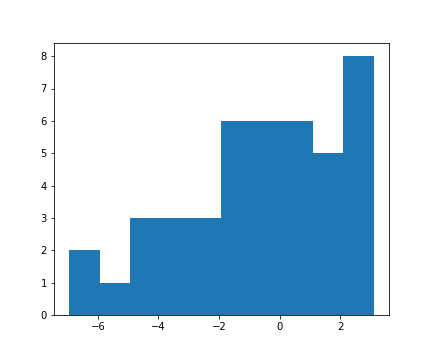

moyenne = -0.6578807340252927
ecarttype = 2.655859957209745


In [22]:
for i, row in enumerate(tab_param):
    path = row['path']
    z_simu = read_meta_test['z']
    z_fit = row['z']
    z_err = row['z_err']
    path = row['path']
    diff_z = (z_simu-z_fit)/z_err

moy = np.mean(diff_z)
ecarttype = np.std(diff_z)

plt.figure(figsize=(6,5))
plt.hist(diff_z)
print('moyenne =', moy)
print('ecarttype =', ecarttype)
plt.show()

<IPython.core.display.Javascript object>


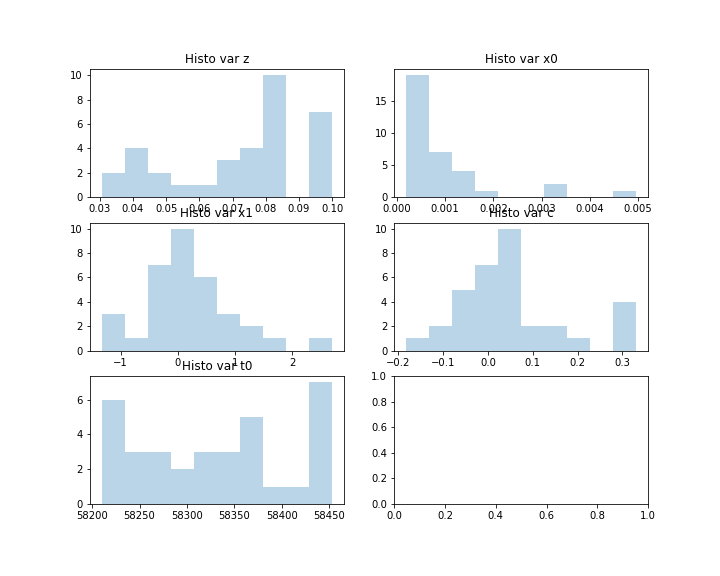

In [23]:
var = ['z', 'x0', 'x1', 'c', 't0']
dico = dict(zip(var, [(0,0), (0,1), (1,0), (1,1), (2,0)]))

fig, axs = plt.subplots(3, 2, figsize=(10,8))
for variables in var :
    err_param = tab_param['{}_err'.format(variables)]
    ipos = dico[variables][0]
    jpos = dico[variables][1]
        
    axs[ipos, jpos].hist(tab_param[variables], alpha = 0.3)
    axs[ipos, jpos].set_title('Histo var {}'.format(variables))